In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "CGxhnEQwmi5QJl69NiqmkhEdw"
Consumer_Secret_Key = "WubfToWPZhwxEHlmRwaPUFS8cZpwHDsD1jNxdg8v1L4ejIefbW"
Access_Token = "1334735354927071232-IqStzBg2yJSPripFOKvggD1cb0mOTE"
Access_Token_Secret = "6fm8Fm2ZcUAxJq1yrMEkNdv95no6mkRoCS6Xk80ysPdFs"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [45]:
posts = api.user_timeline(screen_name="malangraya", count = 5, lang ="id", tweet_mode="extended")

#  Print the last 5 tweets
print("5 Tweets terakhir:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

5 Tweets terakhir:

1) Info #KursDollar hari ini 14135 #Rupiah per #Dollar, 17237 IDR/EUR #KursEuro 
17 Dec 2020 08:22:01 https://t.co/P5vcu6S1Jr #kursRupiah

2) Info #KursDollar hari ini 14151 #Rupiah per #Dollar, 17277 IDR/EUR #KursEuro 
16 Dec 2020 16:22:01 https://t.co/P5vcu6S1Jr #kursRupiah

3) Kental Nuansa Balap, Yamaha Rilis All New Aerox 155 Connected MotoGP Edition - https://t.co/DBxJ75Tykg harga, model, sepeda motor, varian, warna, Yamaha https://t.co/bLdan5GZeW

4) Info #KursDollar hari ini 14163 #Rupiah per #Dollar, 17208 IDR/EUR #KursEuro 
16 Dec 2020 08:22:01 https://t.co/P5vcu6S1Jr #kursRupiah

5) Info #KursDollar hari ini 14193 #Rupiah per #Dollar, 17235 IDR/EUR #KursEuro 
15 Dec 2020 16:22:01 https://t.co/P5vcu6S1Jr #kursRupiah



In [35]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Info #KursDollar hari ini 14135 #Rupiah per #D...
1,Info #KursDollar hari ini 14151 #Rupiah per #D...
2,"Kental Nuansa Balap, Yamaha Rilis All New Aero..."
3,Info #KursDollar hari ini 14163 #Rupiah per #D...
4,Info #KursDollar hari ini 14193 #Rupiah per #D...


In [46]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hashtag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Info KursDollar hari ini 14135 Rupiah per Doll...
1,Info KursDollar hari ini 14151 Rupiah per Doll...
2,"Kental Nuansa Balap, Yamaha Rilis All New Aero..."
3,Info KursDollar hari ini 14163 Rupiah per Doll...
4,Info KursDollar hari ini 14193 Rupiah per Doll...
...,...
95,Royal Enfield Meteor 350 Mengaspal dengan Sede...
96,_mlgkota:
97,Honda Indonesia Siap Luncurkan Motor Baru 10 N...
98,Info KursDollar hari ini 14251 Rupiah per Doll...


In [47]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Info KursDollar hari ini 14135 Rupiah per Doll...,0.000000,0.000000
1,Info KursDollar hari ini 14151 Rupiah per Doll...,0.000000,0.000000
2,"Kental Nuansa Balap, Yamaha Rilis All New Aero...",0.454545,0.136364
3,Info KursDollar hari ini 14163 Rupiah per Doll...,0.000000,0.000000
4,Info KursDollar hari ini 14193 Rupiah per Doll...,0.000000,0.000000
...,...,...,...
95,Royal Enfield Meteor 350 Mengaspal dengan Sede...,0.300000,0.200000
96,_mlgkota:,0.000000,0.000000
97,Honda Indonesia Siap Luncurkan Motor Baru 10 N...,0.000000,0.000000
98,Info KursDollar hari ini 14251 Rupiah per Doll...,0.000000,0.000000


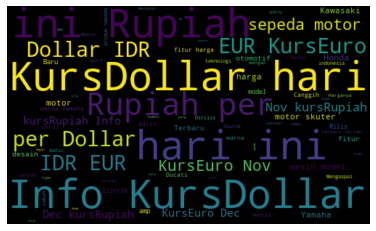

In [48]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Info KursDollar hari ini 14135 Rupiah per Doll...,0.000000,0.000000,Neutral
1,Info KursDollar hari ini 14151 Rupiah per Doll...,0.000000,0.000000,Neutral
2,"Kental Nuansa Balap, Yamaha Rilis All New Aero...",0.454545,0.136364,Positive
3,Info KursDollar hari ini 14163 Rupiah per Doll...,0.000000,0.000000,Neutral
4,Info KursDollar hari ini 14193 Rupiah per Doll...,0.000000,0.000000,Neutral
...,...,...,...,...
95,Royal Enfield Meteor 350 Mengaspal dengan Sede...,0.300000,0.200000,Positive
96,_mlgkota:,0.000000,0.000000,Neutral
97,Honda Indonesia Siap Luncurkan Motor Baru 10 N...,0.000000,0.000000,Neutral
98,Info KursDollar hari ini 14251 Rupiah per Doll...,0.000000,0.000000,Neutral


In [50]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Yamaha Rilis Motor FZ 25 Marvel Edition Captain Marvel &amp; Black Panther -  ABS, edisi spesial, harga, lampu, limited edition, mesin, model, motor, sepeda motor, teknologi, versi, warna, Yamaha 



In [21]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1) Kental Nuansa Balap, Yamaha Rilis All New Aerox 155 Connected MotoGP Edition -  harga, model, sepeda motor, varian, warna, Yamaha 

2) Yamaha Akhirnya Rilis All New Yamaha NMAX 155 Standard Versi Connected -  canggih, fitur, harga, motor, NMAX, sepeda motor, skuter matik, standar, terbaru, varian, versi, Yamaha 

3) Rayakan Ultah ke-75, MV Agusta Rilis Superveloce 75 Anniversario -  Agusta, brand, edisi spesial, fitur, harga, italia, limited edition, mesin, model, modern, motor, otomotif, premium, sepeda motor, spesifikasi, sport, warna 

4) Royal Enfield Meteor 350 Mengaspal dengan Sederet Fitur Canggih -  canggih, fitur, harga, klasik, mesin, model, modern, motor, otomotif, pasar, Royal Enfield, sepeda motor, terbaru, varian, versi 



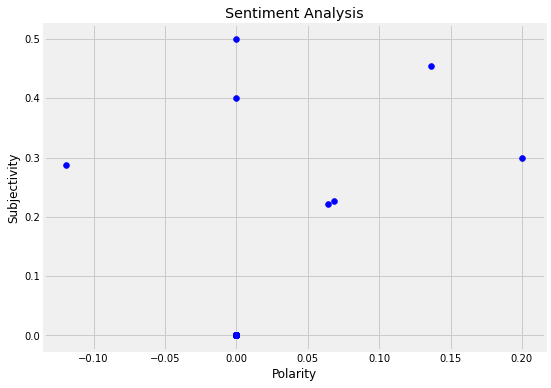

In [51]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

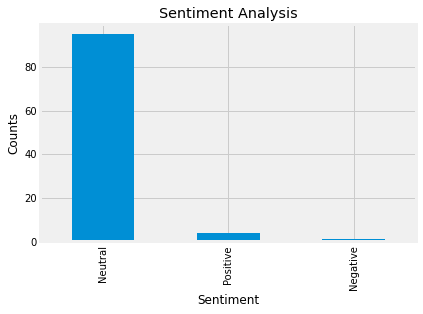

In [52]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

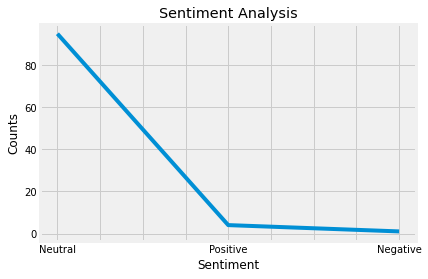

In [53]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()